In [1]:
using Catalyst, DifferentialEquations, Plots, Latexify

In [2]:
rn = @reaction_network begin
    1/(1+x2^2/(b+x1^2)), ∅ --> x1
    1/(1+x1^2/(b+x2^2)), ∅ --> x2
    1, x1 --> ∅
    1, x2 --> ∅
end b

Model ##ReactionSystem#257 with 4 equations
States (2):
  x1(t)
  x2(t)
Parameters (1):
  b

In [3]:
speciesmap(rn)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 2 entries:
  x1(t) => 1
  x2(t) => 2

In [4]:
paramsmap(rn)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 1 entry:
  b => 1

In [5]:
odefun = ODEFunction(convert(ODESystem,rn),jac=true)
F = (u,p) -> odefun(u,p,0)      
J = (u,p) -> odefun.jac(u,p,0)

#3 (generic function with 1 method)

In [6]:
params = [0.4]

1-element Vector{Float64}:
 0.4

In [35]:
p_idx = 1        
p_span = (0.2,1.)   
plot_var_idx = 1

1

In [36]:
using BifurcationKit, Plots, LinearAlgebra, Setfield

In [37]:
opts = ContinuationPar( dsmax = 0.05, dsmin = 0.001, ds = 0.001, maxSteps = 100000, pMin = p_span[1], pMax = p_span[2], detectBifurcation = 3, newtonOptions = NewtonPar(tol = 1e-9, verbose = false, maxIter =10))

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 0.001
  dsmax: Float64 0.05
  ds: Float64 0.001
  theta: Float64 0.5
  doArcLengthScaling: Bool false
  gGoal: Float64 0.5
  gMax: Float64 0.8
  thetaMin: Float64 0.001
  a: Float64 0.5
  tangentFactorExponent: Float64 1.5
  pMin: Float64 0.2
  pMax: Float64 1.0
  maxSteps: Int64 100000
  finDiffEps: Float64 1.0e-9
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 0
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  precisionStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 2
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [38]:
DO = DeflationOperator(2.0, dot, 1. , [fill(0.,length(rn.states))]);

In [39]:
params_input = setindex!(params, p_span[1], p_idx)

branches, = continuation(F,J, params_input, (@lens _[p_idx]) , opts, DO , verbosity = 0, showplot = false, printSolution =(x,p) -> x[plot_var_idx], perturbSolution = (x,p,id) -> (x .+ 0.4 .* rand(length(x))),callbackN = (x, f, J, res, iteration, itlinear, options; kwargs...) -> res<1e7)

(ContResult{NamedTuple{(:x, :param, :itnewton, :itlinear, :ds, :theta, :n_unstable, :n_imag, :stable, :step), Tuple{Float64, Float64, Int64, Int64, Float64, Float64, Int64, Int64, Bool, Int64}}, Vector{ComplexF64}, Matrix{ComplexF64}, BifurcationKit.SpecialPoint{Float64, NamedTuple{(:x,), Tuple{Float64}}, Vector{Float64}}, Vector{NamedTuple{(:x, :p, :step), Tuple{Vector{Float64}, Float64, Int64}}}, Nothing, Vector{Float64}, Setfield.IndexLens{Tuple{Int64}}}[Branch number of points: 801
Branch of Equilibrium
Type of vectors: Vector{Float64}
Parameters p from 0.2 to 1.0
Special points:
 (ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`)
- #  1,    bp at p ≈ +0.44500000 ∈ (+0.44400000, +0.44500000), |δp|=1e-03, [    guess], δ = (-1,  0), step = 244, eigenelements in eig[245], ind_ev =   1
, Branch number of points: 242
Branch of Equilibrium
Type of vectors: Vector{Float64}
Parameters p from 0.201 to 0.4420000000000002
, Branch number of points: 236
Branch 

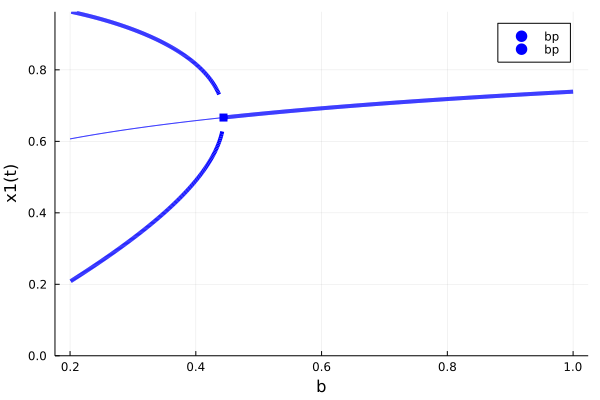

In [40]:
plot(branches...,xlabel=rn.ps[1],ylabel=Symbol(rn.states[1]),markersize=4,
     ylim=(0.,Inf),                                  
     color=:blue,                                    
     plotbifpoints = false, putbifptlegend = false,  
     linewidthstable=4, linewidthunstable=1)     